# Simple Linear Regression

# Step 1: Reading and Understanding the Data

Let's start with the following steps:

  1. Importing data using the pandas library
  2. Understanding the structure of the data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the csv file

advertising = pd.read_csv('/content/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Let's inspect the various aspects of our data

In [4]:
advertising.shape

(200, 4)

this tells us we have 200 rows and 4 features i.e columns

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Step 2: Visualizing the Data

Let's now visualize the data using seaborn. We'll first make a pairplot of all the variables present to visualize which variables are most correlated to `Sales`.

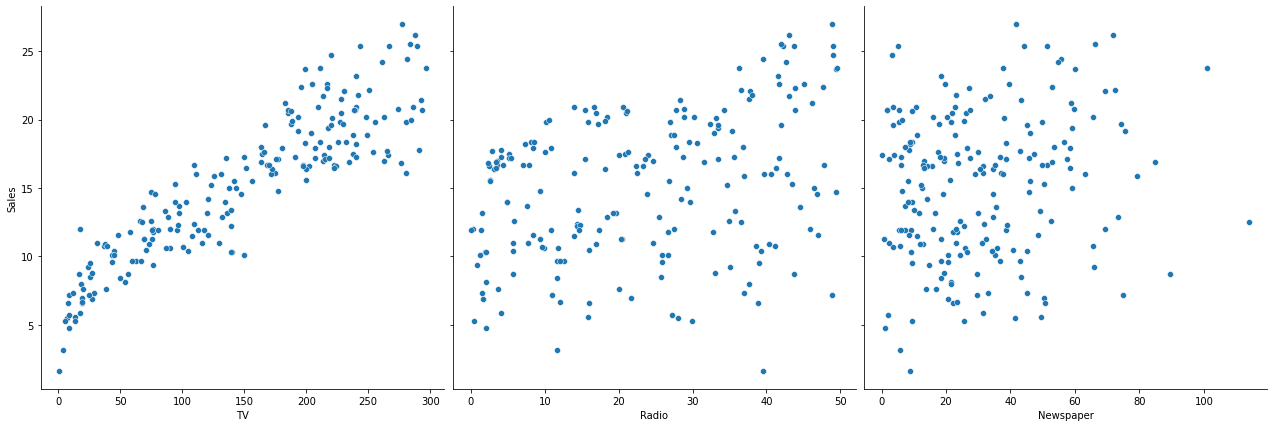

In [13]:
sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=1, kind='scatter', palette="husl")
plt.show()


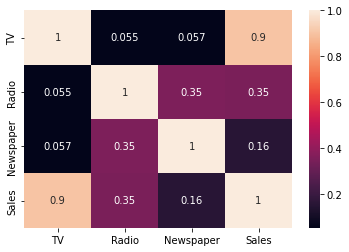

In [14]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

In [15]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


As we can see based on the pairplot and heatmap, it appears that the variable `TV` has the strongest correlation with `Sales`. Therefore, we will proceed with using `TV` as our feature variable for Simple Linear Regression.

A correlation matrix is a square matrix where each cell represents the correlation between two variables. A heat map is a visual representation of the correlation matrix that uses a color gradient to highlight the strength of the correlation between variables.

The correlation coefficient is a measure of the strength and direction of the relationship between two variables. A correlation coefficient of 1 indicates a perfect positive correlation, while a coefficient of -1 indicates a perfect negative correlation. The correlation coefficient always falls within the range of [-1,1].

## Hypothesis Testing in Linear Regression

Before you move on to the model-building part, there is one theoretical aspect left to be addressed: the significance of the derived beta coefficient. When you fit a straight line through the data, you will obviously get **the two parameters of the straight line, i.e., the intercept (β0) and the slope (β1).** Now, while β0 is not of much importance right now, there are a few related aspects that need to be checked and verified. every time you perform a linear regression, you need to test whether the fitted line is significant or not, or to simply put it, you need to test whether β1 is significant or not. And here arrives the idea of hypothesis testing on β1. 

You start by saying that β1 is not significant, i.e. there is no relationship between X and y.

So in order to perform the hypothesis test, you first propose the null hypothesis that β1 is 0. And the alternative hypothesis thus becomes β1 is not zero.

    Null Hypothesis (H0): β1=0
    Alternate Hypothesis (HA): β1≠0

Let's first discuss the implications of this hypothesis test. If you fail to reject the null hypothesis, that would mean that β1  is zero, which would simply mean that β1 is insignificant and of no use in the model. Similarly, if you reject the null hypothesis, it would mean that β1 is not zero and the line fitted is a significant one. Now, in order to perform the hypothesis test, you need to derive the p-value for the given beta. If you're hazy on what p-value is and how it is calculated,

Let's do a quick recap of how you calculate p-value anyway:

    Calculate the value of the t-score for the mean point (in this case, zero, according to the null hypothesis 
    that we have stated) on the distribution.
    Calculate the p-value from the cumulative probability for the given t-score using the t-table.
    Make the decision on the basis of the p-value with respect to the given value of β  (significance level)

 

Now, if the p-value turns out to be less than 0.05, you can reject the null hypothesis and state that β1 is indeed significant.

 

Please note that all of the above steps will be performed by Python automatically

# Step 3: Performing Simple Linear Regression

---

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

## Generic Steps in Model building using `statsmodel`

We first assign the feature variable, `TV` in this case, to the variable `x` and the response variable, `Sales`, to the variable `y`.

In [16]:
x = advertising['TV']
y = advertising['Sales']

## Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [20]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

## Building Linear Model

You need to first import the `statsmodel.api` library using which you'll will perform the linear regression.

In [21]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [22]:
# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)

# fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

     const     TV
79     1.0  116.0
197    1.0  177.0
38     1.0   43.1
24     1.0   62.3
122    1.0  224.0
..     ...    ...
106    1.0   25.0
14     1.0  204.1
92     1.0  217.7
179    1.0  165.6
102    1.0  280.2

[160 rows x 2 columns]


In [23]:
# print the parameters, i.e intercept and the slope of the regression line fitted
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.71e-59
Time:                        06:49:19   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

#### Looking at some key statistics from the summary

The values we are concerned with are :     
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficient for TV is 0.0555, with a very low p-value

The coefficient is statistically significant. So the association is not purely by chance.

2. R-squared is 0.813

meaning that 81.3% of the variance in `Sales` is explaining by `TV`
This is descent R-squared value.

3. F-statistic has a very low p-value(practically low)

meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 7.0071+ 0.055 \times TV $

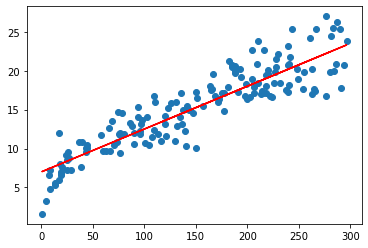

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.0071 + 0.055*X_train, 'r')
plt.show()

# Step 4: Residual Analysis



To validate assumptions of the model, and hence the reliability for inference

### Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [26]:
y_train_pred = lr.predict(X_train_sm) # predicted
res = (y_train - y_train_pred) # residuals = actual - predicted

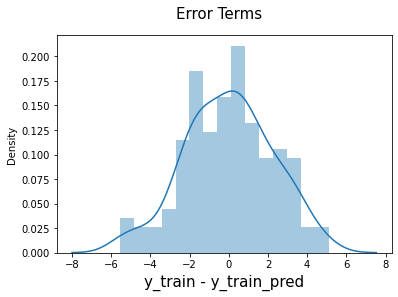

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize= 15)

plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

The residuals are normally distributed with a mean of 0, which indicates that everything is in order.

### Looking for patterns in the residuals

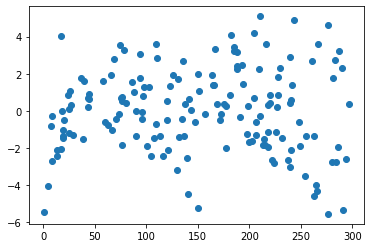

In [29]:
plt.scatter(X_train, res)
plt.show()

We have reason to believe that the model fit is not due to chance and has some degree of predictive capability. The normal distribution of the residual terms permits some interpretation of the coefficients.

However, the fact that the variance of the residuals increases with X suggests that there is substantial variability that this model cannot account for.

# Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [30]:
# add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [31]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### RMSE

In [33]:
# return the mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

2.470035001123256

### R-squared on test data

In [34]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

### Visualizing the ft on the test set

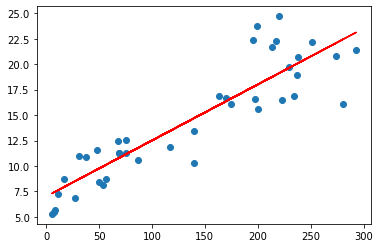

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0071 + 0.055 * X_test, 'r')
plt.show()

# Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we have already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [39]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [40]:
X_train_lm.shape

(160,)

In [41]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

ValueError: ignored

You saw that shape of X_train_lm is (160,) but regression expects (160,1). Note that your model is expecting a 2D array, failing which you get an error. Therefore, in this case, you need to reshape your variables X_train and X_test into X_train_lm and X_test_lm using the following code:

In [42]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [43]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [44]:
from sklearn.linear_model import LinearRegression

# representing LinearRegression as lr(creating LinearRegression Object)
lm = LinearRegression()

# fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [45]:
print(lm.intercept_)
print(lm.coef_)

6.995532914307688
[0.05410548]


The equationwe get is the same as what we got before!

$ Sales = 6.9995 + 0.055* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [57]:
X_train_scaled.shape

(140, 1)

In [58]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [59]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [60]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [61]:
# Check the parameters
lr_scaled.params

array([-2.44596010e-16,  9.03212773e-01])

In [62]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.52e-52
Time:                        07:41:04   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent